#BREAST CANCER DIAGNOSIS
###Problem Statement
Interactive image processing techniques, along with machine learning models, have been used to create a highly accurate system for diagnosis of breast tumors.
For this data we have the Diagnosis (M = malignant, B = benign) as our target variable.
The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



###Import the important libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

###Read the file

In [2]:
df=pd.read_csv("/content/data.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
#df.describe()

In [ ]:
#df.info()

###Dropped the irrelevant columns

In [3]:
df.drop(columns=['Unnamed: 32'], inplace=True)


###Encoded the target variable
Converted it into binary

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


###I used a correlation figure to gain a deeper understanding of the relationships within my data, this helps to make informed decisions when it comes to modelling.

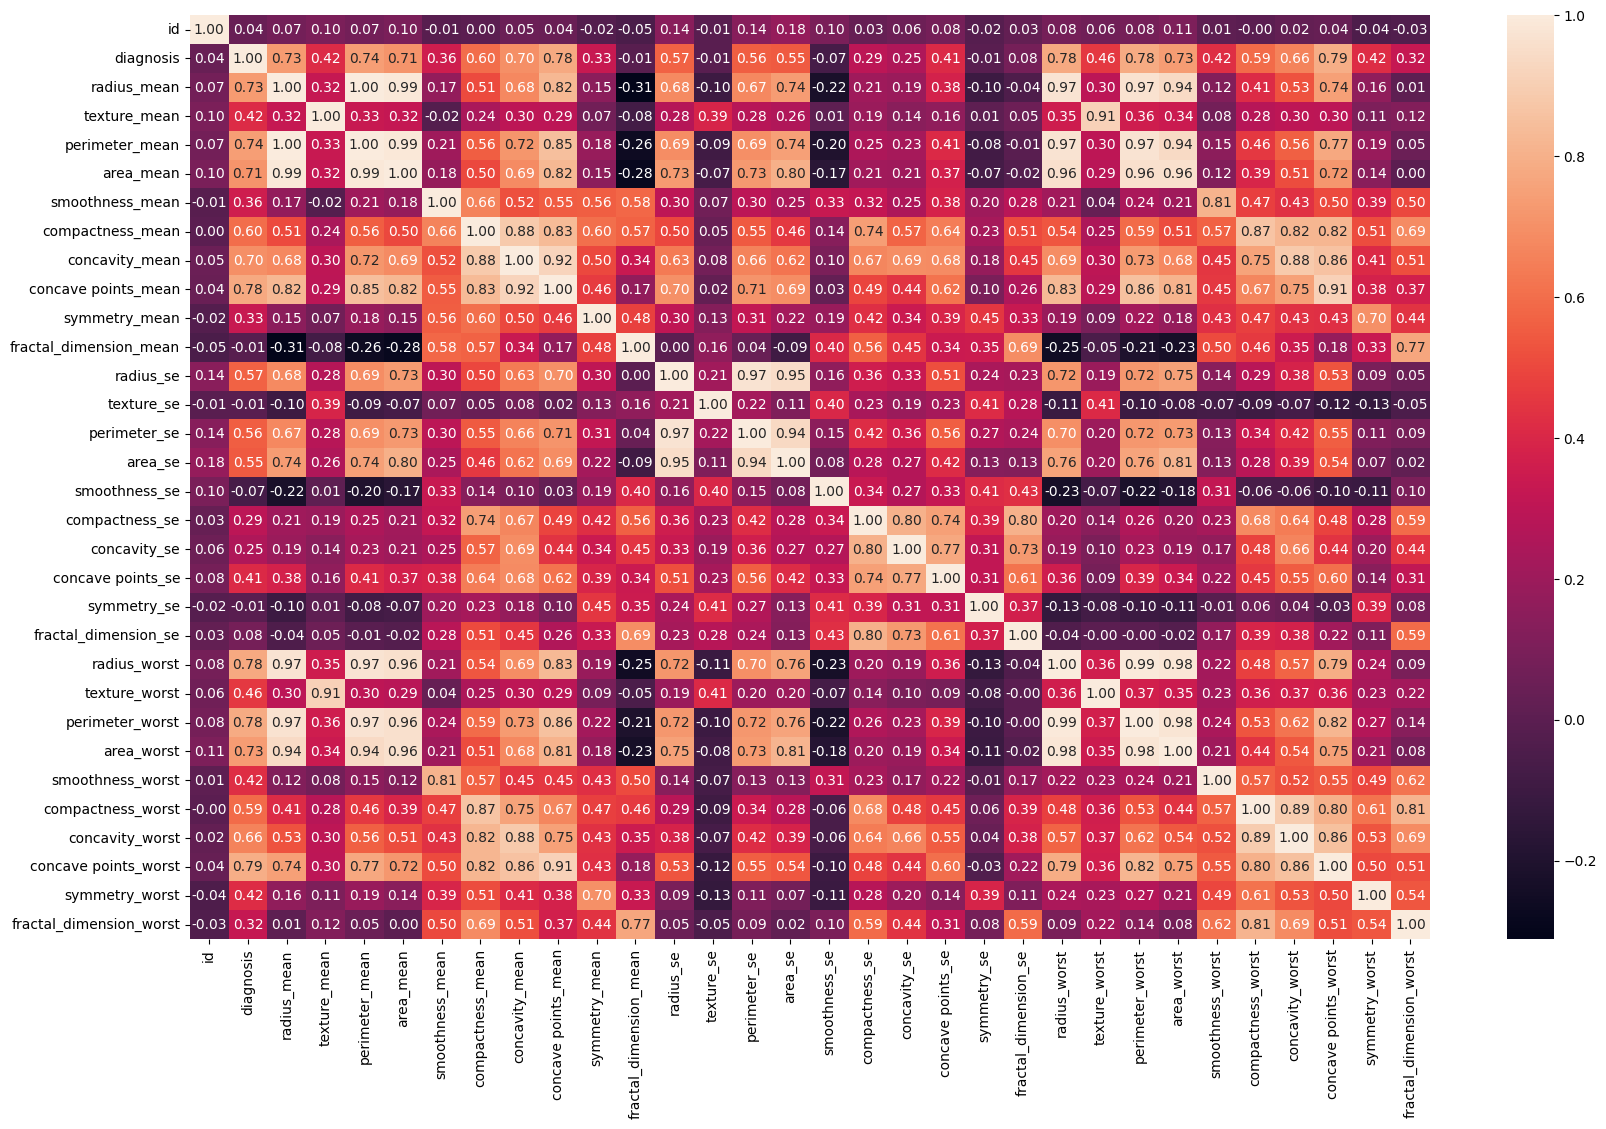

In [5]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()


#Distribution of the target
Using the Countplot shows the count of each class in the target variable.
Understanding the distribution of target classes helps me see if the dataset is imbalanced or not.

<ipython-input-6-9eca8bc8d420>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


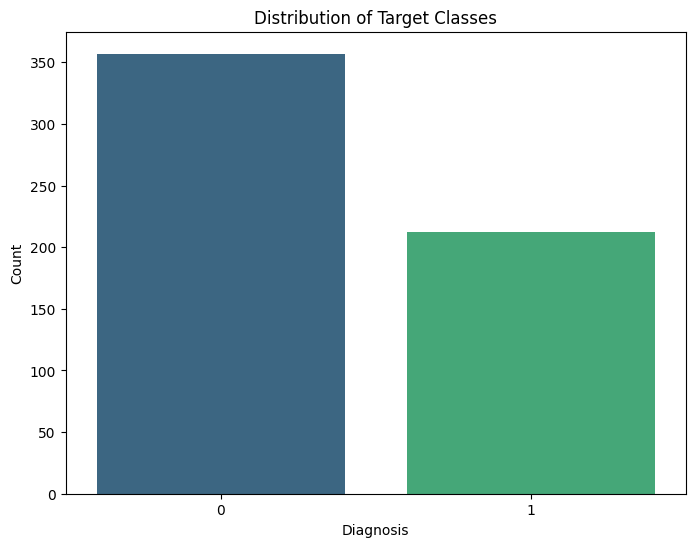

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Target Classes')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

#Model Training
###Defining the x and y
###Scaling the data is important for modeling.
###For this project i used random forest, logistic regression and support vector machine models.

In [7]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



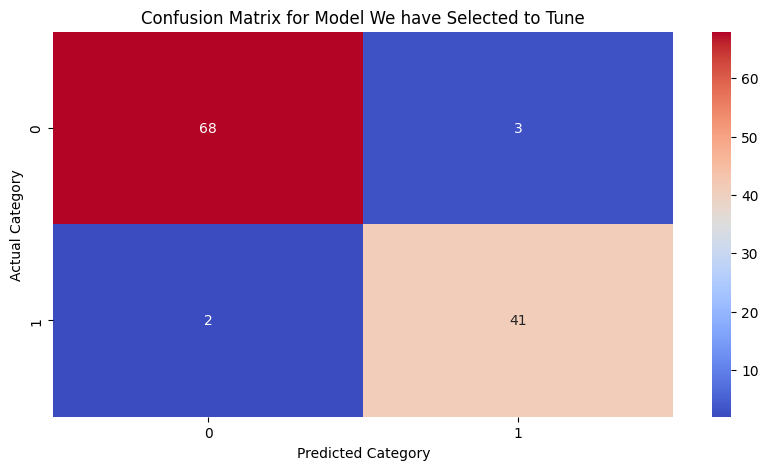

array([[68,  3],
       [ 2, 41]])

In [10]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

conf_matrix

In [11]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


#Interpretation
Based on the results above my best performing model was the random forest which had a higher recall and precision.

#Plotting the ROC Curve
ROC Curve shows the trade-off between true positive rate and false positive rate.

AUC represents the overall performance of the model. Higher values indicate better performance.

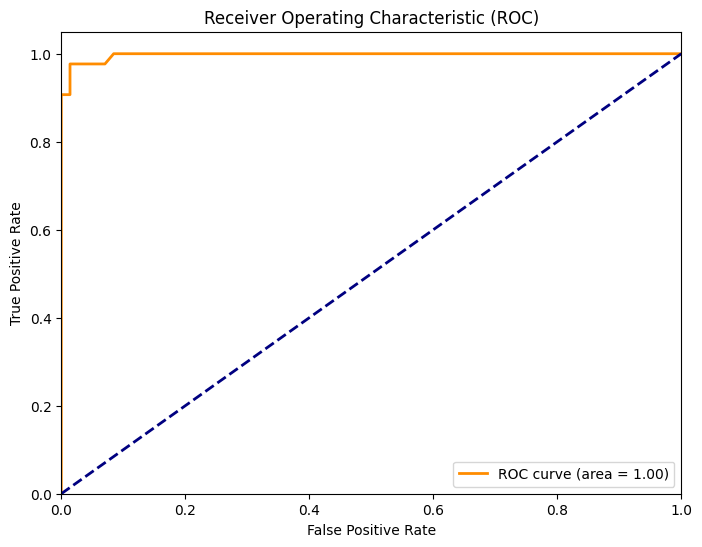

In [12]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#Model Tuning


In [ ]:
#create a feature space
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

rf = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9604395604395604


In [13]:

tuned_rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)


In [14]:
#Train the model on the training data
tuned_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [15]:
# Predict the labels for the test set
y_pred = tuned_rf_model.predict(X_test)

In [17]:
f1 = f1_score(y_test, y_pred)

print(f'F1 Score on the test set: {f1:.2f}')

F1 Score on the test set: 0.95
